In [71]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANELS=3
dataset =tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

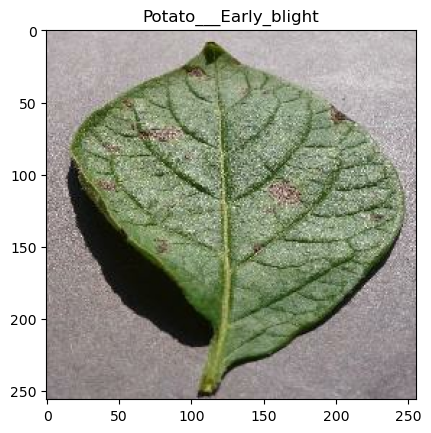

In [6]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

In [7]:
train_size=0.8
train=int(len(dataset)*train_size)
train

54

In [8]:
train_ds=dataset.take(train)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(train)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [14]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1/255)
    
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [20]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model=models.Sequential ([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
    
])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
54/54 [==============================] - 43s 476ms/step - loss: 0.9318 - accuracy: 0.4664 - val_loss: 0.8745 - val_accuracy: 0.5312
Epoch 2/20
54/54 [==============================] - 9s 170ms/step - loss: 0.7205 - accuracy: 0.6499 - val_loss: 0.6104 - val_accuracy: 0.7552
Epoch 3/20
54/54 [==============================] - 8s 156ms/step - loss: 0.3486 - accuracy: 0.8438 - val_loss: 0.5110 - val_accuracy: 0.7812
Epoch 4/20
54/54 [==============================] - 8s 157ms/step - loss: 0.2965 - accuracy: 0.8825 - val_loss: 0.2714 - val_accuracy: 0.8958
Epoch 5/20
54/54 [==============================] - 8s 155ms/step - loss: 0.1928 - accuracy: 0.9253 - val_loss: 0.1982 - val_accuracy: 0.9062
Epoch 6/20
54/54 [==============================] - 8s 157ms/step - loss: 0.1814 - accuracy: 0.9404 - val_loss: 0.1593 - val_accuracy: 0.9323
Epoch 7/20
54/54 [==============================] - 9s 160ms/step - loss: 0.1228 - accuracy: 0.9572 - val_loss: 0.2424 - val_accuracy: 0.9115
Epoch

AttributeError: module 'tensorflow' has no attribute '_version_'

In [25]:
print(tf.__version__)

2.10.0


In [26]:
print(tf.__version__)

2.10.0


In [27]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 27ms/step - loss: 0.0844 - accuracy: 0.9727


In [30]:
history.params 

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [32]:
history.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


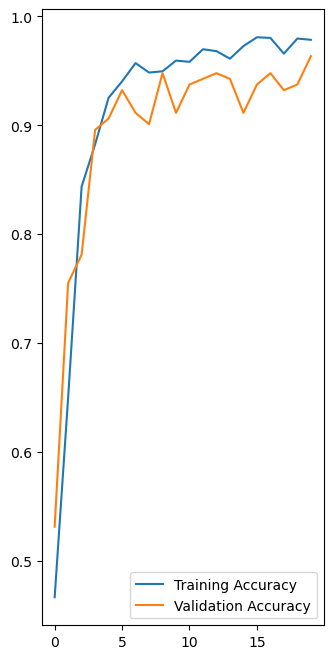

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20),acc,label='Training Accuracy')
plt.plot(range(20),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')

In [47]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

1/1 [==============================] - 0s 57ms/step
Predicted batch
[2.9967093e-01 7.0032388e-01 5.1524385e-06]
Potato___Late_blight


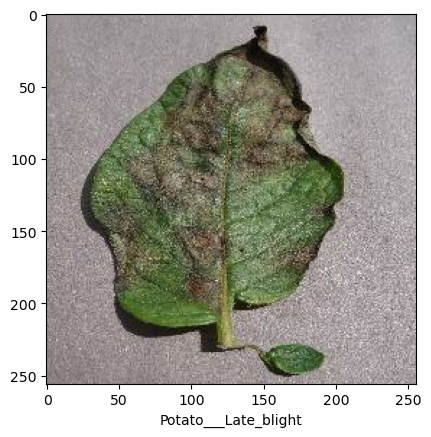

In [83]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]
    
    plt.imshow(first_image)
    plt.xlabel(class_names[first_label])
    batch_prediction=model.predict(image_batch)
    print('Predicted batch')
    print(batch_prediction[0])
    print(class_names[np.argmax(batch_prediction[0])])

In [73]:
np.argmax([[9.2413449e-01, 7.5851642e-02, 1.3871649e-05]])

0

In [87]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class ,confidence

1/1 [==============================] - 0s 29ms/step


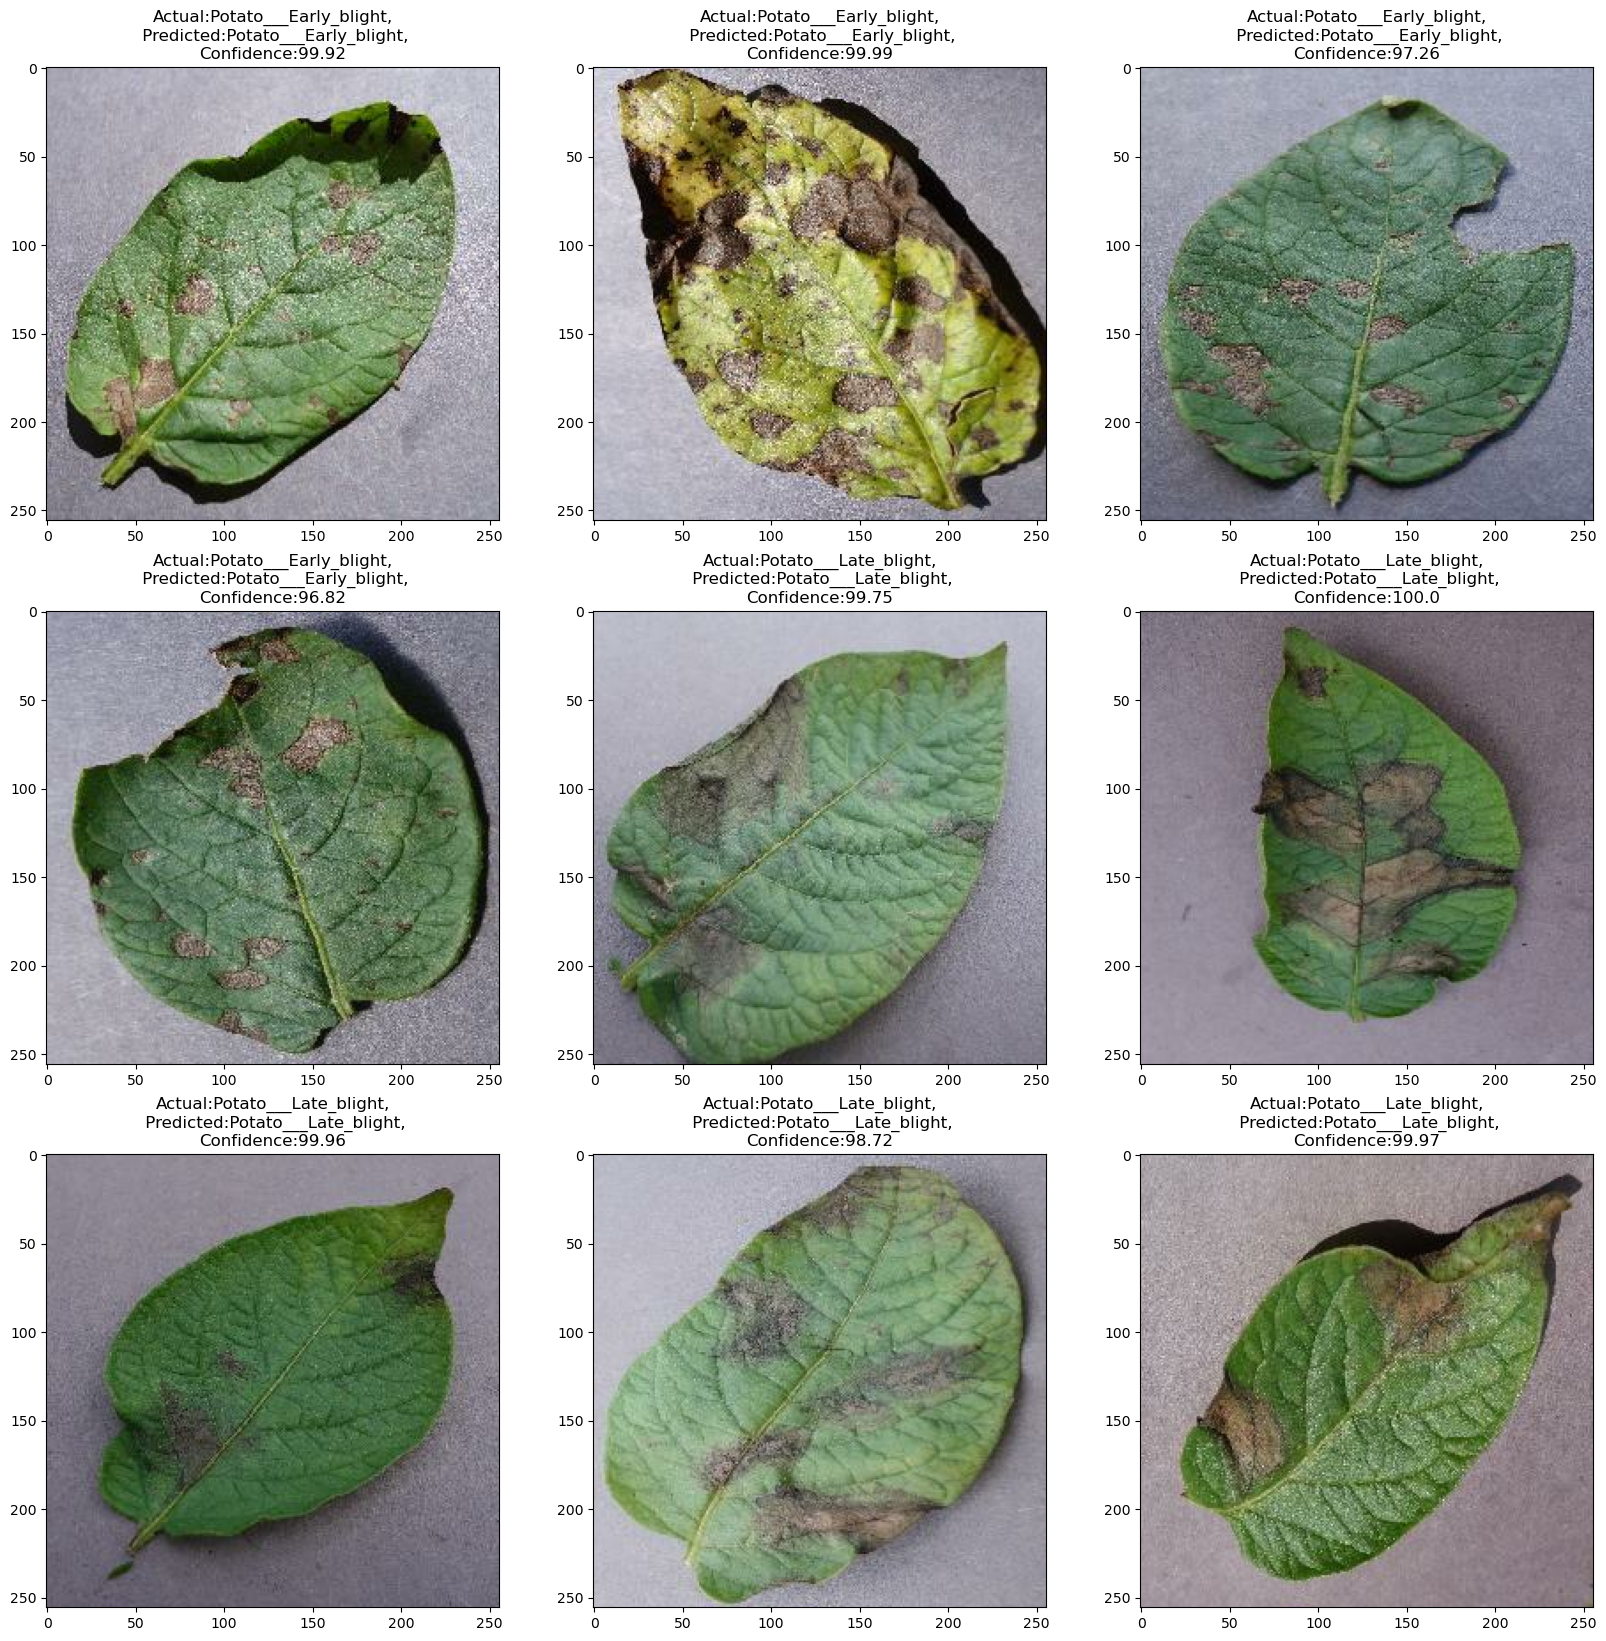

In [102]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\nConfidence:{confidence}")
        
        
        plt.axis="off"

In [104]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [107]:
import os 
os.listdir("../models")

['1', 'assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']